## Predicting a  Gausion destribution 

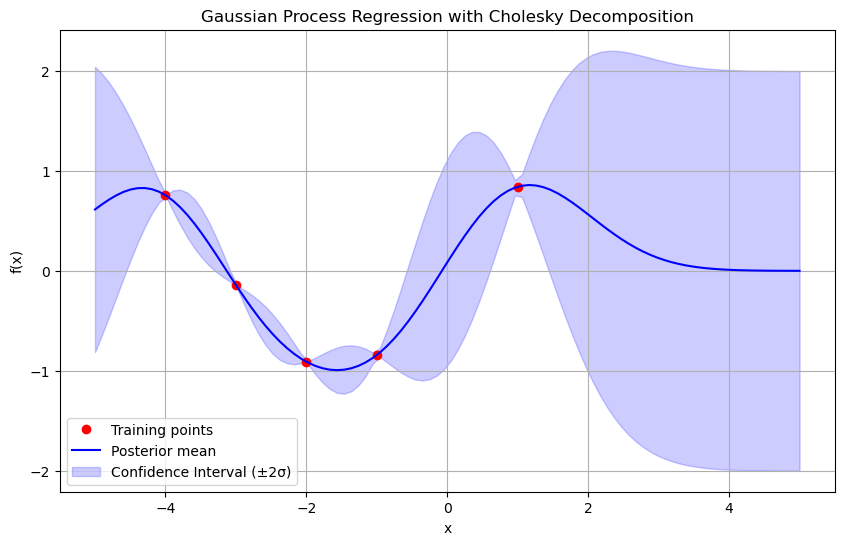

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# RBF (Squared Exponential) Kernel
# -------------------------------
def rbf_kernel(x1, x2, length_scale=1.0, sigma_f=1.0):
    """
    Compute the RBF kernel between vectors x1 and x2.
    """
    x1 = np.atleast_2d(x1)
    x2 = np.atleast_2d(x2)
    sqdist = np.sum(x1**2, axis=1).reshape(-1,1) + np.sum(x2**2, axis=1) - 2 * x1 @ x2.T
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)

# -------------------------------
# GP Posterior using Cholesky
# -------------------------------
def gp_posterior(X_train, y_train, X_test, kernel, noise=1e-8):
    """
    Compute GP posterior mean and covariance at test points.
    """
    K = kernel(X_train, X_train) + noise * np.eye(len(X_train))         # (n x n)
    K_s = kernel(X_train, X_test)                                       # (n x m)
    K_ss = kernel(X_test, X_test) + 1e-8 * np.eye(len(X_test))          # (m x m)

    # Cholesky decomposition: K = L Lᵀ
    L = np.linalg.cholesky(K)

    # Solve for alpha: (K + σ²I)⁻¹ y = L⁻ᵀ L⁻¹ y
    v = np.linalg.solve(L, y_train)
    alpha = np.linalg.solve(L.T, v)

    # Predictive mean
    mu_s = K_s.T @ alpha

    # Predictive covariance
    v = np.linalg.solve(L, K_s)
    cov_s = K_ss - v.T @ v

    return mu_s, cov_s

# -------------------------------
# Generate Toy Training Data
# -------------------------------
X_train = np.array([[-4], [-3], [-2], [-1], [1]])
y_train = np.sin(X_train).ravel()

# Test points
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)

# -------------------------------
# Run GP Regression
# -------------------------------
mu_s, cov_s = gp_posterior(X_train, y_train, X_test, rbf_kernel, noise=1e-5)
std_s = np.sqrt(np.diag(cov_s))

# -------------------------------
# Plot Posterior Predictions
# -------------------------------
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'ro', label='Training points')
plt.plot(X_test, mu_s, 'b-', label='Posterior mean')
plt.fill_between(X_test.ravel(),
                 mu_s - 2*std_s,
                 mu_s + 2*std_s,
                 color='blue', alpha=0.2, label='Confidence Interval (±2σ)')
plt.title("Gaussian Process Regression with Cholesky Decomposition")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()



## prediction g single point 

Predicted mean at x*=1.5: 0.9837901840683898
Predicted std deviation: 0.11657799700873737


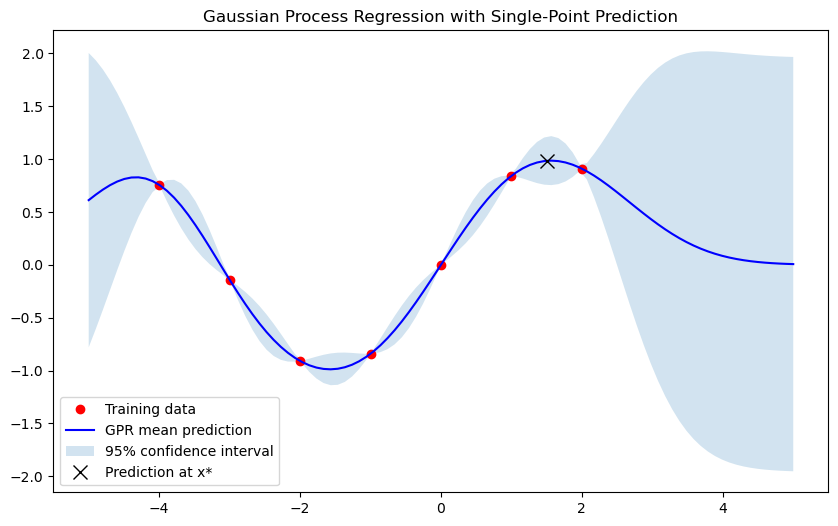

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# RBF kernel function
def rbf_kernel(x1, x2, length_scale=1.0, sigma_f=1.0):
    sqdist = np.sum((x1[:, None] - x2[None, :]) ** 2, axis=2 if x1.ndim == 2 else 0)
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)

# Training data
X_train = np.array([-4, -3, -2, -1, 0, 1, 2]).reshape(-1, 1)
y_train = np.sin(X_train).ravel()

# Test input (single point)
X_test = np.array([[1.5]])

# Kernel parameters
length_scale = 1.0
sigma_f = 1.0
sigma_y = 1e-8  # small noise

# Compute the kernel matrices
K = rbf_kernel(X_train, X_train, length_scale, sigma_f) + sigma_y * np.eye(len(X_train))
K_s = rbf_kernel(X_train, X_test, length_scale, sigma_f)
K_ss = rbf_kernel(X_test, X_test, length_scale, sigma_f)

# Cholesky decomposition
L = np.linalg.cholesky(K)
alpha = np.linalg.solve(L.T, np.linalg.solve(L, y_train))

# Predictive mean
mu_star = K_s.T @ alpha

# Predictive variance
v = np.linalg.solve(L, K_s)
var_star = K_ss - v.T @ v
std_star = np.sqrt(np.diag(var_star))

# Print results
print(f"Predicted mean at x*={X_test.flatten()[0]}: {mu_star[0]}")
print(f"Predicted std deviation: {std_star[0]}")

# Plot
X_plot = np.linspace(-5, 5, 100).reshape(-1, 1)
K_plot = rbf_kernel(X_train, X_plot, length_scale, sigma_f)
mu_plot = K_plot.T @ alpha
v_plot = np.linalg.solve(L, K_plot)
var_plot = rbf_kernel(X_plot, X_plot, length_scale, sigma_f) - v_plot.T @ v_plot
std_plot = np.sqrt(np.diag(var_plot))

plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'ro', label='Training data')
plt.plot(X_plot, mu_plot, 'b-', label='GPR mean prediction')
plt.fill_between(X_plot.flatten(),
                 mu_plot - 1.96 * std_plot,
                 mu_plot + 1.96 * std_plot,
                 alpha=0.2, label='95% confidence interval')
plt.plot(X_test, mu_star, 'kx', label='Prediction at x*', markersize=10)
plt.legend()
plt.title('Gaussian Process Regression with Single-Point Prediction')
plt.show()


<>:50: SyntaxWarning: invalid escape sequence '\s'
<>:56: SyntaxWarning: invalid escape sequence '\s'
<>:50: SyntaxWarning: invalid escape sequence '\s'
<>:56: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jarif\AppData\Local\Temp\ipykernel_34688\3982493491.py:50: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(X_test, y_true, 'g--', label='True $\sin(x)$')
C:\Users\jarif\AppData\Local\Temp\ipykernel_34688\3982493491.py:56: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Gaussian Process Regression on $\sin(x)$")


R² Score on test data: 0.9986


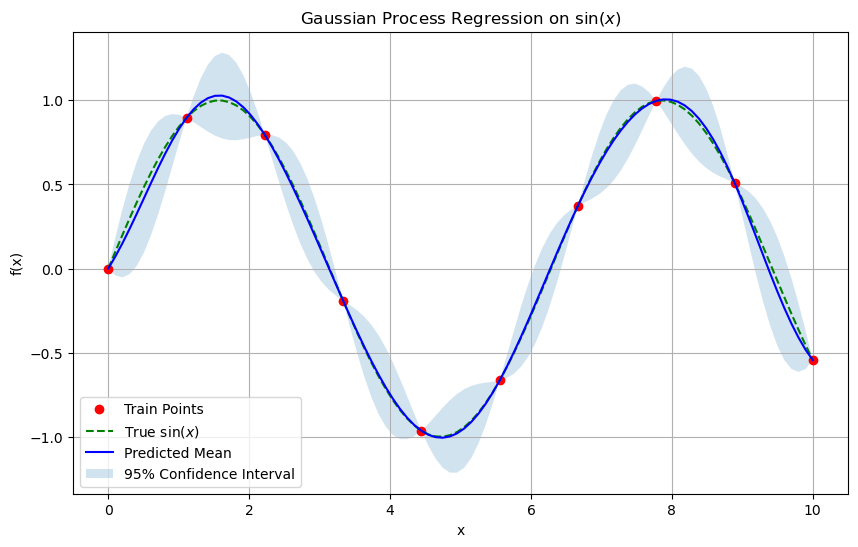

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Define RBF Kernel function
def rbf_kernel(x1, x2, length_scale=1.0, sigma_f=1.0):
    sqdist = np.sum(x1**2, 1).reshape(-1,1) + np.sum(x2**2, 1) - 2*np.dot(x1, x2.T)
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)

# Generate training data
X_train = np.linspace(0, 10, 10).reshape(-1, 1)
y_train = np.sin(X_train).ravel()

# Generate test data
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_true = np.sin(X_test).ravel()

# Kernel parameters
length_scale = 1.0
sigma_f = 1.0
sigma_y = 1e-8  # Noise term

# Compute covariance matrices
K = rbf_kernel(X_train, X_train, length_scale, sigma_f) + sigma_y**2 * np.eye(len(X_train))
K_s = rbf_kernel(X_train, X_test, length_scale, sigma_f)
K_ss = rbf_kernel(X_test, X_test, length_scale, sigma_f)

# Cholesky decomposition
L = np.linalg.cholesky(K)

# Solve for alpha: K^-1 y = (L Lᵀ)^-1 y = L^(-T) L^(-1) y
v = np.linalg.solve(L, y_train)
alpha = np.linalg.solve(L.T, v)

# Predictive mean
mu_s = np.dot(K_s.T, alpha)

# Predictive variance
v = np.linalg.solve(L, K_s)
var_s = K_ss - np.dot(v.T, v)
std_s = np.sqrt(np.diag(var_s))

# Accuracy (R^2 score)
r2 = r2_score(y_true, mu_s)
print(f"R² Score on test data: {r2:.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'ro', label='Train Points')
plt.plot(X_test, y_true, 'g--', label='True $\sin(x)$')
plt.plot(X_test, mu_s, 'b-', label='Predicted Mean')
plt.fill_between(X_test.ravel(),
                 mu_s - 1.96 * std_s,
                 mu_s + 1.96 * std_s,
                 alpha=0.2, label='95% Confidence Interval')
plt.title("Gaussian Process Regression on $\sin(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


### Gausin process for non curve da+ta

R² Score on step function: 0.4516


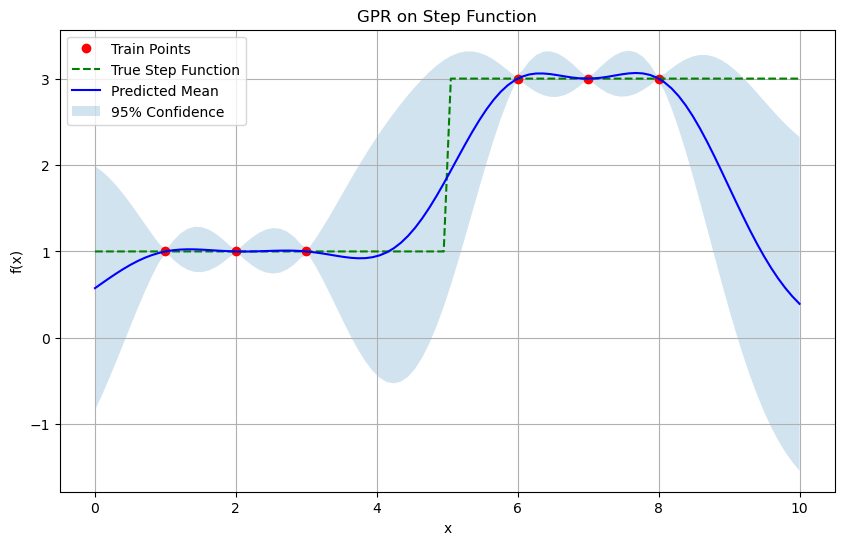

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Define RBF Kernel function
def rbf_kernel(x1, x2, length_scale=1.0, sigma_f=1.0):
    sqdist = np.sum(x1**2, 1).reshape(-1,1) + np.sum(x2**2, 1) - 2*np.dot(x1, x2.T)
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)

# Step function as target
def step_function(x):
    return np.where(x < 5, 1.0, 3.0)

# Training data
X_train = np.array([1, 2, 3, 6, 7, 8]).reshape(-1, 1)
y_train = step_function(X_train).ravel()

# Test data
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_true = step_function(X_test).ravel()

# Kernel parameters
length_scale = 1.0
sigma_f = 1.0
sigma_y = 1e-8

# Compute kernel matrices
K = rbf_kernel(X_train, X_train, length_scale, sigma_f) + sigma_y**2 * np.eye(len(X_train))
K_s = rbf_kernel(X_train, X_test, length_scale, sigma_f)
K_ss = rbf_kernel(X_test, X_test, length_scale, sigma_f)

# Cholesky decomposition
L = np.linalg.cholesky(K)

# Mean prediction
v = np.linalg.solve(L, y_train)
alpha = np.linalg.solve(L.T, v)
mu_s = np.dot(K_s.T, alpha)

# Variance prediction
v = np.linalg.solve(L, K_s)
var_s = K_ss - np.dot(v.T, v)
std_s = np.sqrt(np.diag(var_s))

# Accuracy
r2 = r2_score(y_true, mu_s)
print(f"R² Score on step function: {r2:.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'ro', label='Train Points')
plt.plot(X_test, y_true, 'g--', label='True Step Function')
plt.plot(X_test, mu_s, 'b-', label='Predicted Mean')
plt.fill_between(X_test.ravel(), mu_s - 1.96*std_s, mu_s + 1.96*std_s, alpha=0.2, label='95% Confidence')
plt.title("GPR on Step Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


## Diabetease 

Mean Squared Error (MSE): 8475.36
R^2 Score: -0.5997


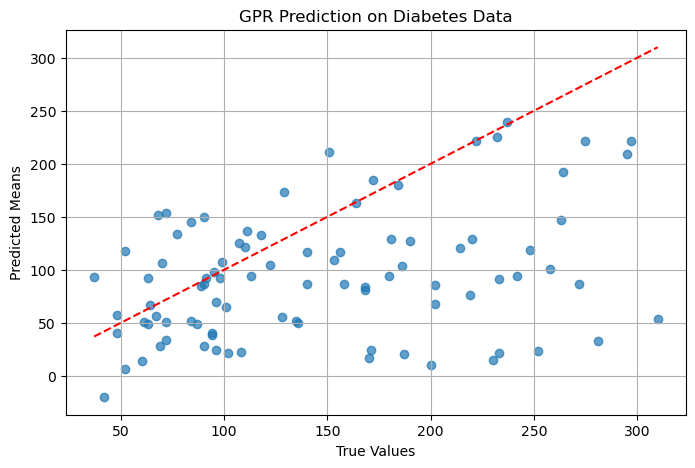

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# RBF Kernel
def rbf_kernel(x1, x2, length_scale=1.0, sigma_f=1.0):
    sqdist = np.sum(x1**2, 1).reshape(-1,1) + np.sum(x2**2, 1) - 2*np.dot(x1, x2.T)
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)

# GPR with Cholesky decomposition
def gaussian_process_regression(X_train, y_train, X_test, length_scale=1.0, sigma_f=1.0, sigma_y=1e-6):
    K = rbf_kernel(X_train, X_train, length_scale, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = rbf_kernel(X_train, X_test, length_scale, sigma_f)
    K_ss = rbf_kernel(X_test, X_test, length_scale, sigma_f)

    L = np.linalg.cholesky(K)
    alpha = np.linalg.solve(L.T, np.linalg.solve(L, y_train))
    mu_s = np.dot(K_s.T, alpha)

    v = np.linalg.solve(L, K_s)
    var_s = K_ss - np.dot(v.T, v)
    std_s = np.sqrt(np.diag(var_s))

    return mu_s, std_s

# Run GPR
mu_s, std_s = gaussian_process_regression(X_train, y_train, X_test)

# Evaluate
mse = mean_squared_error(y_test, mu_s)
r2 = r2_score(y_test, mu_s)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.4f}")

# Plot true vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, mu_s, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Means")
plt.title("GPR Prediction on Diabetes Data")
plt.grid(True)
plt.show()


## Lets apply it on financil dataset 

#### Microsoft share prediction with gausian process

In [ ]:
! pip install yfinance
! pip install ta

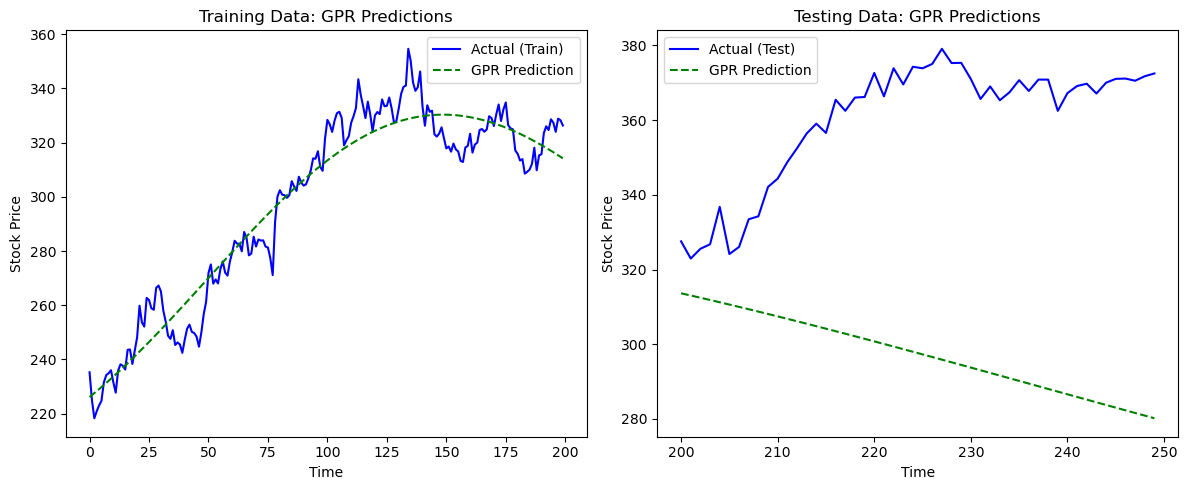

Training RMSE (GPR): 9.2749
Testing RMSE (GPR): 67.3478


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load stock price data (Microsoft stock)
def load_stock_data(ticker, start, end):
    stock = yf.download(ticker, start=start, end=end, progress=False)
    prices = stock["Close"].values
    dates = np.arange(len(prices)).reshape(-1, 1)
    return dates, prices

# Normalize data
def normalize_data(prices):
    scaler = MinMaxScaler()
    return scaler, scaler.fit_transform(prices.reshape(-1, 1)).flatten()

# Split dataset
def split_data(dates, prices_scaled, train_ratio=0.8):
    train_size = int(len(dates) * train_ratio)
    return dates[:train_size], prices_scaled[:train_size], dates[train_size:], prices_scaled[train_size:]

# Train Gaussian Process model
def train_gaussian_process(X_train, y_train, X_test):
    kernel = C(1.0) * RBF(length_scale=10.0)
    gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
    gp.fit(X_train, y_train)
    y_train_pred = gp.predict(X_train)
    y_test_pred = gp.predict(X_test)
    return gp, y_train_pred, y_test_pred

# Compute RMSE
def compute_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Main script execution
if __name__ == "__main__":
    # 1. Load and prepare data
    X, prices = load_stock_data("MSFT", start="2023-01-01", end="2024-01-01")
    scaler, prices_scaled = normalize_data(prices)
    X_train, y_train, X_test, y_test = split_data(X, prices_scaled)

    # 2. Train and predict using GPR only
    gp_model, y_train_pred, y_test_pred = train_gaussian_process(X_train, y_train, X_test)

    # 3. Inverse transform predictions
    y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
    y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_train_pred_orig = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
    y_test_pred_orig = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

    # 4. Plot results
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(X_train, y_train_orig, label="Actual (Train)", color="blue")
    plt.plot(X_train, y_train_pred_orig, label="GPR Prediction", color="green", linestyle="dashed")
    plt.title("Training Data: GPR Predictions")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(X_test, y_test_orig, label="Actual (Test)", color="blue")
    plt.plot(X_test, y_test_pred_orig, label="GPR Prediction", color="green", linestyle="dashed")
    plt.title("Testing Data: GPR Predictions")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 5. Print RMSE
    print(f"Training RMSE (GPR): {compute_rmse(y_train_orig, y_train_pred_orig):.4f}")
    print(f"Testing RMSE (GPR): {compute_rmse(y_test_orig, y_test_pred_orig):.4f}")


** KRR

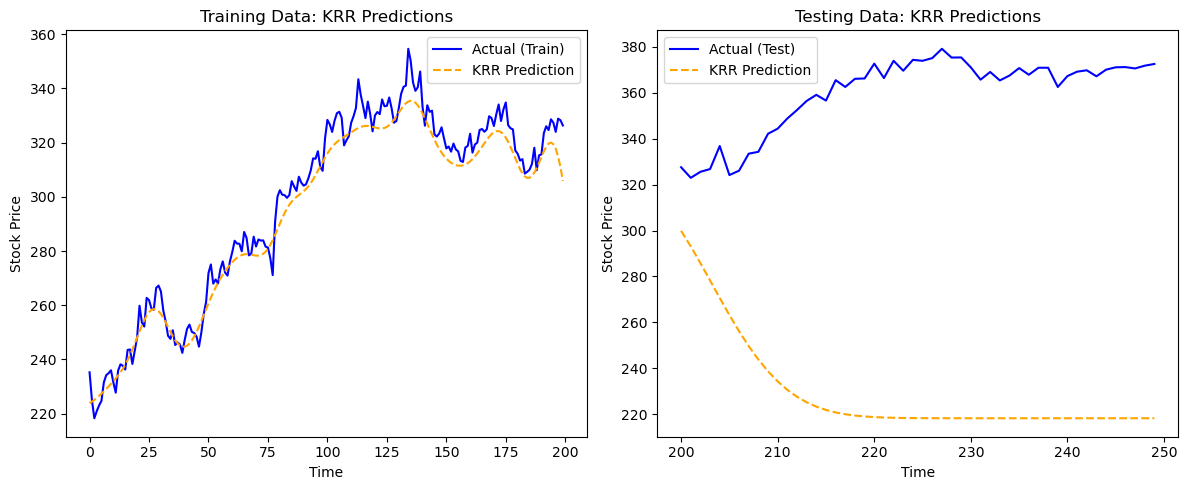

Training RMSE (KRR): 6.5556
Testing RMSE (KRR): 135.6340


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load stock price data
def load_stock_data(ticker, start, end):
    stock = yf.download(ticker, start=start, end=end, progress=False)
    prices = stock["Close"].values
    dates = np.arange(len(prices)).reshape(-1, 1)
    return dates, prices

# Normalize prices
def normalize_data(prices):
    scaler = MinMaxScaler()
    prices_scaled = scaler.fit_transform(prices.reshape(-1, 1)).flatten()
    return scaler, prices_scaled

# Split into training and testing
def split_data(dates, prices_scaled, train_ratio=0.8):
    train_size = int(len(dates) * train_ratio)
    return dates[:train_size], prices_scaled[:train_size], dates[train_size:], prices_scaled[train_size:]

# Train and predict using Kernel Ridge Regression
def train_kernel_ridge(X_train, y_train, X_test):
    krr = KernelRidge(kernel='rbf', alpha=1.0, gamma=0.01)
    krr.fit(X_train, y_train)
    y_train_pred = krr.predict(X_train)
    y_test_pred = krr.predict(X_test)
    return krr, y_train_pred, y_test_pred

# RMSE computation
def compute_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Main script
if __name__ == "__main__":
    # 1. Load data
    X, prices = load_stock_data("MSFT", start="2023-01-01", end="2024-01-01")
    
    # 2. Normalize prices
    scaler, prices_scaled = normalize_data(prices)
    
    # 3. Split into train/test
    X_train, y_train, X_test, y_test = split_data(X, prices_scaled)

    # 4. Train KRR model
    model, y_train_pred, y_test_pred = train_kernel_ridge(X_train, y_train, X_test)

    # 5. Inverse transform
    y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
    y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_train_pred_orig = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
    y_test_pred_orig = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

    # 6. Plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(X_train, y_train_orig, label="Actual (Train)", color="blue")
    plt.plot(X_train, y_train_pred_orig, label="KRR Prediction", color="orange", linestyle="dashed")
    plt.title("Training Data: KRR Predictions")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(X_test, y_test_orig, label="Actual (Test)", color="blue")
    plt.plot(X_test, y_test_pred_orig, label="KRR Prediction", color="orange", linestyle="dashed")
    plt.title("Testing Data: KRR Predictions")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 7. Print RMSE
    print(f"Training RMSE (KRR): {compute_rmse(y_train_orig, y_train_pred_orig):.4f}")
    print(f"Testing RMSE (KRR): {compute_rmse(y_test_orig, y_test_pred_orig):.4f}")


** LR

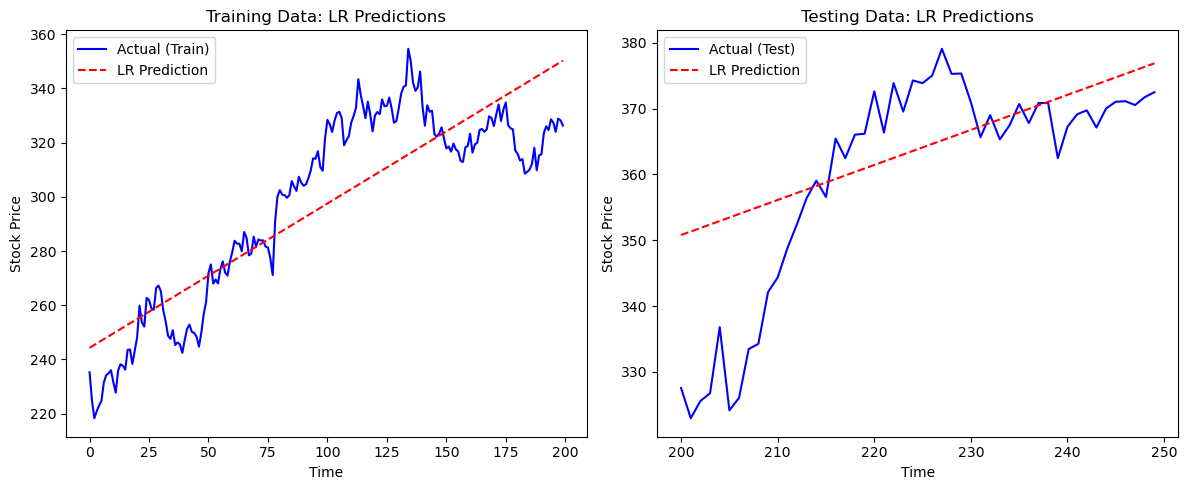

Training RMSE (LR): 17.5527
Testing RMSE (LR): 12.1005


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load stock price data
def load_stock_data(ticker, start, end):
    stock = yf.download(ticker, start=start, end=end, progress=False)
    prices = stock["Close"].values
    dates = np.arange(len(prices)).reshape(-1, 1)
    return dates, prices

# Normalize prices
def normalize_data(prices):
    scaler = MinMaxScaler()
    prices_scaled = scaler.fit_transform(prices.reshape(-1, 1)).flatten()
    return scaler, prices_scaled

# Split into training and testing
def split_data(dates, prices_scaled, train_ratio=0.8):
    train_size = int(len(dates) * train_ratio)
    return dates[:train_size], prices_scaled[:train_size], dates[train_size:], prices_scaled[train_size:]

# Train and predict using Linear Regression
def train_linear_regression(X_train, y_train, X_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    return lr, y_train_pred, y_test_pred

# RMSE computation
def compute_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Main script
if __name__ == "__main__":
    # 1. Load data
    X, prices = load_stock_data("MSFT", start="2023-01-01", end="2024-01-01")
    
    # 2. Normalize prices
    scaler, prices_scaled = normalize_data(prices)
    
    # 3. Split into train/test
    X_train, y_train, X_test, y_test = split_data(X, prices_scaled)

    # 4. Train LR model
    model, y_train_pred, y_test_pred = train_linear_regression(X_train, y_train, X_test)

    # 5. Inverse transform
    y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
    y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_train_pred_orig = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
    y_test_pred_orig = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

    # 6. Plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(X_train, y_train_orig, label="Actual (Train)", color="blue")
    plt.plot(X_train, y_train_pred_orig, label="LR Prediction", color="red", linestyle="dashed")
    plt.title("Training Data: LR Predictions")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(X_test, y_test_orig, label="Actual (Test)", color="blue")
    plt.plot(X_test, y_test_pred_orig, label="LR Prediction", color="red", linestyle="dashed")
    plt.title("Testing Data: LR Predictions")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 7. Print RMSE
    print(f"Training RMSE (LR): {compute_rmse(y_train_orig, y_train_pred_orig):.4f}")
    print(f"Testing RMSE (LR): {compute_rmse(y_test_orig, y_test_pred_orig):.4f}")


### LR +residua;

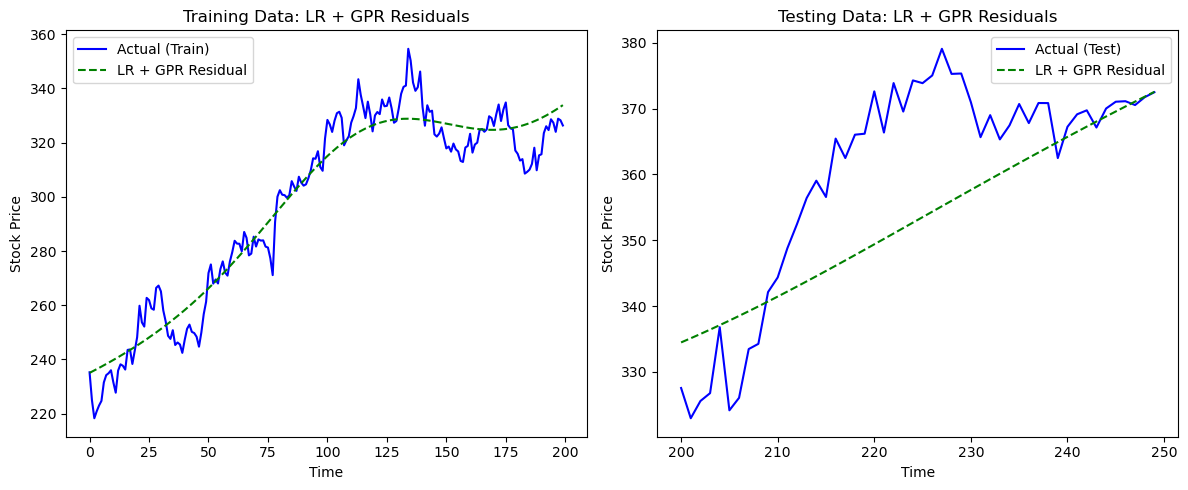

Training RMSE (LR + GPR): 8.6921
Testing RMSE (LR + GPR): 12.3052


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load stock data
def load_stock_data(ticker, start, end):
    stock = yf.download(ticker, start=start, end=end, progress=False)
    prices = stock["Close"].values
    dates = np.arange(len(prices)).reshape(-1, 1)
    return dates, prices

# Normalize prices
def normalize_data(prices):
    scaler = MinMaxScaler()
    prices_scaled = scaler.fit_transform(prices.reshape(-1, 1)).flatten()
    return scaler, prices_scaled

# Split data
def split_data(dates, prices_scaled, train_ratio=0.8):
    train_size = int(len(dates) * train_ratio)
    return dates[:train_size], prices_scaled[:train_size], dates[train_size:], prices_scaled[train_size:]

# Train Linear Regression
def train_lr(X_train, y_train, X_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    return lr, lr.predict(X_train), lr.predict(X_test)

# Train Gaussian Process on residuals
def train_gp(X_train, residuals_train, X_test):
    kernel = C(1.0) * RBF(length_scale=10.0)
    gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
    gp.fit(X_train, residuals_train)
    return gp.predict(X_train), gp.predict(X_test)

# RMSE
def compute_rmse(true, pred):
    return np.sqrt(mean_squared_error(true, pred))

# Main execution
if __name__ == "__main__":
    # 1. Load + normalize
    X, prices = load_stock_data("MSFT", "2023-01-01", "2024-01-01")
    scaler, prices_scaled = normalize_data(prices)
    X_train, y_train, X_test, y_test = split_data(X, prices_scaled)

    # 2. Linear Regression
    lr, y_lr_train, y_lr_test = train_lr(X_train, y_train, X_test)
    residuals_train = y_train - y_lr_train

    # 3. Residual prediction using GPR
    gp_res_train, gp_res_test = train_gp(X_train, residuals_train, X_test)

    # 4. Combine LR + GP
    final_train_pred = y_lr_train + gp_res_train  # Use LR predictions + residual correction from GPR
    final_test_pred = y_lr_test + gp_res_test    # Use LR predictions + residual correction from GPR

    # 5. Inverse transform to get actual price scale
    y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
    y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    final_train_orig = scaler.inverse_transform(final_train_pred.reshape(-1, 1)).flatten()
    final_test_orig = scaler.inverse_transform(final_test_pred.reshape(-1, 1)).flatten()

    # 6. Plot
    plt.figure(figsize=(12, 5))

    # Training plot
    plt.subplot(1, 2, 1)
    plt.plot(X_train, y_train_orig, label="Actual (Train)", color="blue")
    plt.plot(X_train, final_train_orig, label="LR + GPR Residual", color="green", linestyle="dashed")
    plt.title("Training Data: LR + GPR Residuals")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()

    # Testing plot
    plt.subplot(1, 2, 2)
    plt.plot(X_test, y_test_orig, label="Actual (Test)", color="blue")
    plt.plot(X_test, final_test_orig, label="LR + GPR Residual", color="green", linestyle="dashed")
    plt.title("Testing Data: LR + GPR Residuals")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 7. Print RMSE
    print(f"Training RMSE (LR + GPR): {compute_rmse(y_train_orig, final_train_orig):.4f}")
    print(f"Testing RMSE (LR + GPR): {compute_rmse(y_test_orig, final_test_orig):.4f}")


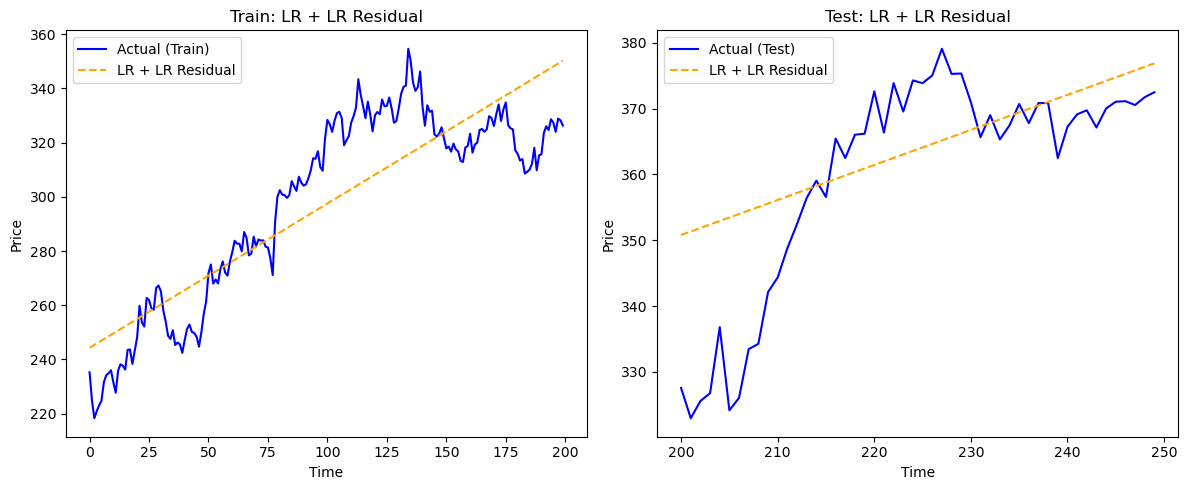

Training RMSE (LR + LR): 17.5527
Testing RMSE (LR + LR): 12.1005


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load stock data
def load_stock_data(ticker, start, end):
    stock = yf.download(ticker, start=start, end=end, progress=False)
    prices = stock["Close"].values
    dates = np.arange(len(prices)).reshape(-1, 1)
    return dates, prices

# Normalize prices
def normalize_data(prices):
    scaler = MinMaxScaler()
    prices_scaled = scaler.fit_transform(prices.reshape(-1, 1)).flatten()
    return scaler, prices_scaled

# Split data
def split_data(dates, prices_scaled, train_ratio=0.8):
    train_size = int(len(dates) * train_ratio)
    return dates[:train_size], prices_scaled[:train_size], dates[train_size:], prices_scaled[train_size:]

# Compute RMSE
def compute_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Main script
if __name__ == "__main__":
    # 1. Load + Normalize
    X, prices = load_stock_data("MSFT", "2023-01-01", "2024-01-01")
    scaler, prices_scaled = normalize_data(prices)
    X_train, y_train, X_test, y_test = split_data(X, prices_scaled)

    # 2. First Linear Regression
    lr1 = LinearRegression().fit(X_train, y_train)
    y_pred_lr1_train = lr1.predict(X_train)
    y_pred_lr1_test = lr1.predict(X_test)
    residuals_train = y_train - y_pred_lr1_train

    # 3. Second Linear Regression on Residuals
    lr2 = LinearRegression().fit(X_train, residuals_train)
    y_res_lr2_train = lr2.predict(X_train)
    y_res_lr2_test = lr2.predict(X_test)

    # 4. Final predictions
    final_train_preds = y_pred_lr1_train + y_res_lr2_train
    final_test_preds = y_pred_lr1_test + y_res_lr2_test

    # 5. Inverse transform
    y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    final_train_original = scaler.inverse_transform(final_train_preds.reshape(-1, 1)).flatten()
    final_test_original = scaler.inverse_transform(final_test_preds.reshape(-1, 1)).flatten()

    # 6. Plotting
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(X_train, y_train_original, label="Actual (Train)", color="blue")
    plt.plot(X_train, final_train_original, label="LR + LR Residual", color="orange", linestyle="--")
    plt.title("Train: LR + LR Residual")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(X_test, y_test_original, label="Actual (Test)", color="blue")
    plt.plot(X_test, final_test_original, label="LR + LR Residual", color="orange", linestyle="--")
    plt.title("Test: LR + LR Residual")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 7. Print RMSE
    print(f"Training RMSE (LR + LR): {compute_rmse(y_train_original, final_train_original):.4f}")
    print(f"Testing RMSE (LR + LR): {compute_rmse(y_test_original, final_test_original):.4f}")


### BITcoin Analysisi with GPR

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import gpytorch
from sklearn.preprocessing import StandardScaler

# Step 1: Download BTC data
btc = yf.download("BTC-USD", start="2023-01-01", end="2024-12-31")
btc = btc.dropna()

# Step 2: Use date as input (numerical time)
btc['Days'] = (btc.index - btc.index[0]).days
X = btc['Days'].values.reshape(-1, 1)
y = btc['Close'].values

# Step 3: Standardize the data
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_scaled = x_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Convert to torch tensors
train_x = torch.tensor(X_scaled, dtype=torch.float32)
train_y = torch.tensor(y_scaled, dtype=torch.float32)

# Step 4: Define GP Model
class GPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel()
        )

    def forward(self, x):
        mean = self.mean_module(x)
        covar = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean, covar)

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GPModel(train_x, train_y, likelihood)

# Step 5: Train the model
model.train()
likelihood.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(100):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

# Step 6: Prediction
model.eval()
likelihood.eval()
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    pred = likelihood(model(train_x))
    mean = pred.mean.numpy()
    lower, upper = pred.confidence_region()
    mean_unscaled = y_scaler.inverse_transform(mean.reshape(-1, 1)).flatten()

# Step 7: Plot
plt.figure(figsize=(12, 6))
plt.plot(btc.index, y, label='Actual')
plt.plot(btc.index, mean_unscaled, label='GPR Prediction', color='orange')
plt.fill_between(btc.index, 
                 y_scaler.inverse_transform(lower.reshape(-1, 1)).flatten(),
                 y_scaler.inverse_transform(upper.reshape(-1, 1)).flatten(),
                 alpha=0.3, label='Confidence Interval')
plt.title("Bitcoin Price Forecast using Gaussian Process Regression")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


ModuleNotFoundError: No module named 'torch'

### Gold price prediction

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
C:\Users\jarif\AppData\Local\Temp\ipykernel_36956\2213196457.py:50: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jarif\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


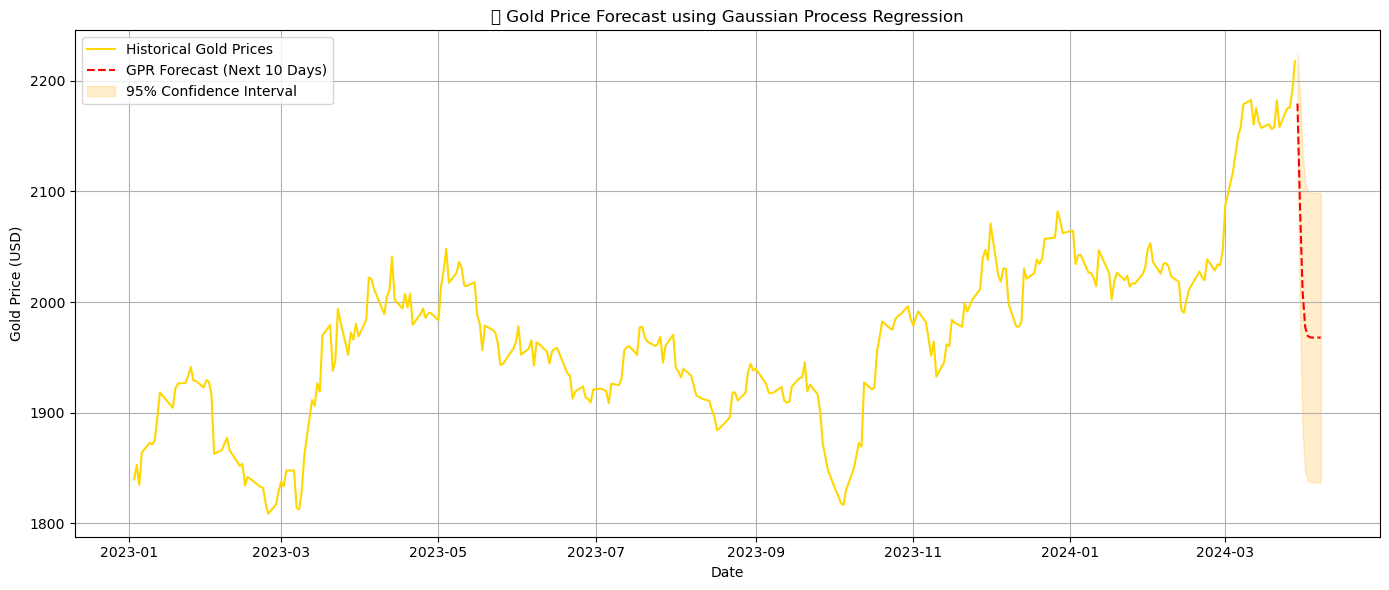

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import StandardScaler
from datetime import timedelta

# Step 1: Download historical gold prices
data = yf.download("GC=F", start="2023-01-01", end="2024-04-01")
data['Days'] = (data.index - data.index[0]).days
X = data['Days'].values.reshape(-1, 1)
y = data['Close'].values

# Step 2: Normalize
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Step 3: Train GPR
kernel = C(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-4)
gpr.fit(X_scaled, y_scaled)

# Step 4: Predict next 10 days
last_day = data.index[-1]
future_days = np.array([X[-1][0] + i for i in range(1, 11)]).reshape(-1, 1)
future_scaled = scaler_x.transform(future_days)

y_pred_scaled, sigma = gpr.predict(future_scaled, return_std=True)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Step 5: Plot
future_dates = [last_day + timedelta(days=i) for i in range(1, 11)]

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], label="Historical Gold Prices", color='gold')
plt.plot(future_dates, y_pred, label="GPR Forecast (Next 10 Days)", color='red', linestyle='--')
plt.fill_between(future_dates, 
                 y_pred - 1.96 * sigma * scaler_y.scale_[0], 
                 y_pred + 1.96 * sigma * scaler_y.scale_[0], 
                 color='orange', alpha=0.2, label='95% Confidence Interval')
plt.title("🟡 Gold Price Forecast using Gaussian Process Regression")
plt.xlabel("Date")
plt.ylabel("Gold Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed

✅ RMSE on last 30 days: 1024.53 USD


C:\Users\jarif\AppData\Local\Temp\ipykernel_36956\1772805617.py:76: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jarif\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


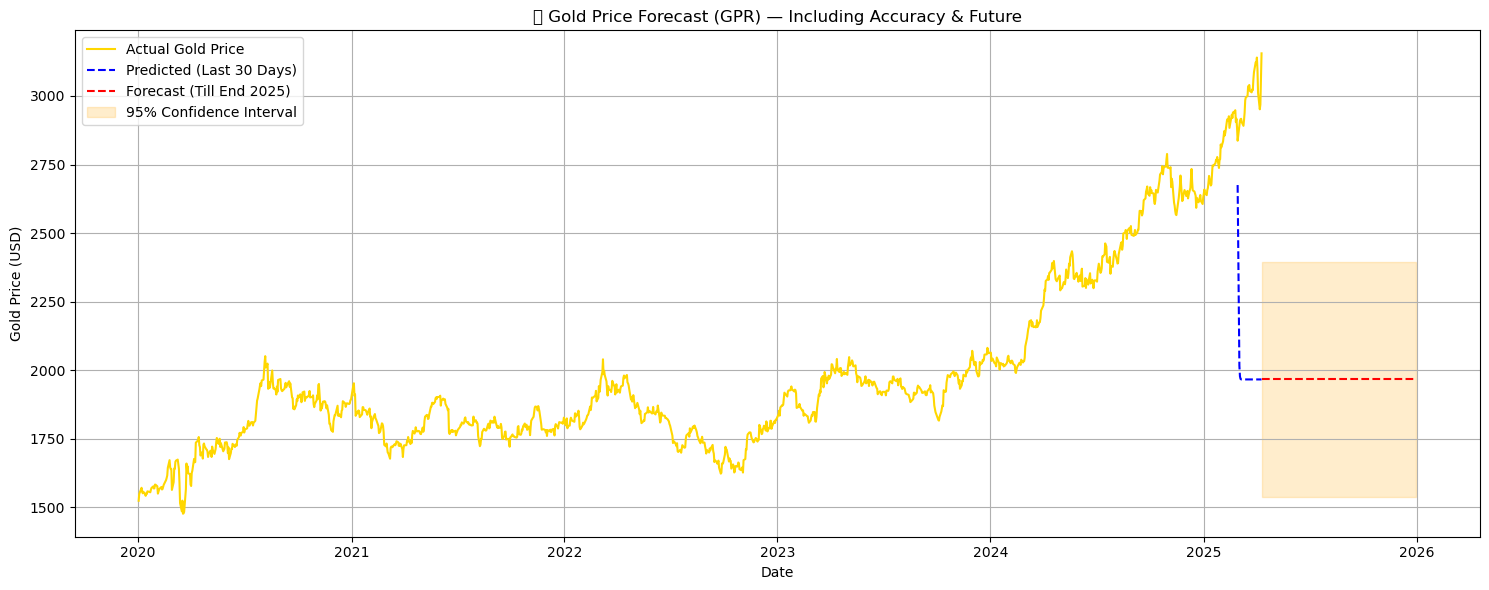

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

# Step 1: Load Gold data
data = yf.download("GC=F", start="2020-01-01", end=str(datetime.today().date()))
data['Days'] = (data.index - data.index[0]).days
X = data['Days'].values.reshape(-1, 1)
y = data['Close'].values

# Step 2: Split Train/Test
train_days = -30  # last 30 days for test
X_train, X_test = X[:train_days], X[train_days:]
y_train, y_test = y[:train_days], y[train_days:]

# Step 3: Normalize
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

X_test_scaled = scaler_x.transform(X_test)

# Step 4: Train GPR
kernel = C(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-4)
gpr.fit(X_train_scaled, y_train_scaled)

# Step 5: Predict on test (for accuracy)
y_test_pred_scaled, sigma_test = gpr.predict(X_test_scaled, return_std=True)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

# Step 6: Predict future till end of 2025
last_day = X[-1][0]
future_range =  (datetime(2025,12,31) - data.index[0]).days
future_days = np.arange(last_day + 1, future_range + 1).reshape(-1, 1)
future_days_scaled = scaler_x.transform(future_days)

y_future_scaled, sigma_future = gpr.predict(future_days_scaled, return_std=True)
y_future = scaler_y.inverse_transform(y_future_scaled.reshape(-1, 1)).flatten()

future_dates = [data.index[-1] + timedelta(days=i+1) for i in range(len(y_future))]

# Step 7: Accuracy on last 30 days
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"✅ RMSE on last 30 days: {rmse:.2f} USD")

# Step 8: Plot actual, test prediction, and future prediction
plt.figure(figsize=(15, 6))

# Actual
plt.plot(data.index, y, label="Actual Gold Price", color='gold')

# Test predictions
plt.plot(data.index[train_days:], y_test_pred, label="Predicted (Last 30 Days)", linestyle='--', color='blue')

# Future predictions
plt.plot(future_dates, y_future, label="Forecast (Till End 2025)", linestyle='--', color='red')
plt.fill_between(future_dates, 
                 y_future - 1.96 * sigma_future * scaler_y.scale_[0], 
                 y_future + 1.96 * sigma_future * scaler_y.scale_[0], 
                 alpha=0.2, color='orange', label='95% Confidence Interval')

plt.title("🟡 Gold Price Forecast (GPR) — Including Accuracy & Future")
plt.xlabel("Date")
plt.ylabel("Gold Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\jarif\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


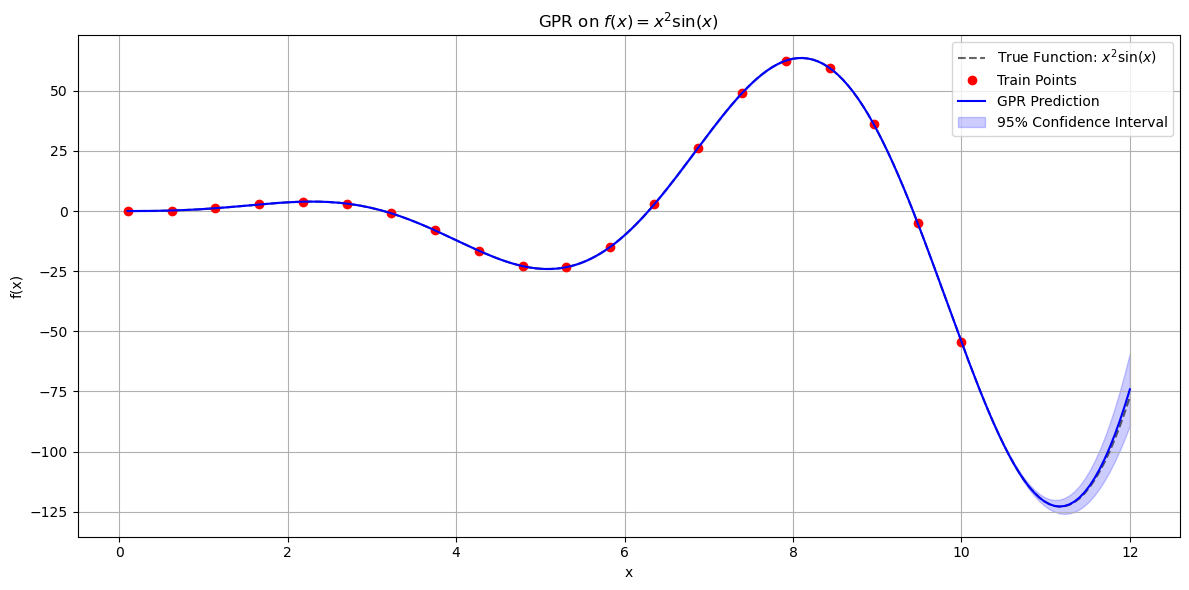

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Step 1: Generate synthetic data
def f(x):
    return x**2 * np.sin(x)

# Training data (sparse for realism)
X_train = np.atleast_2d(np.linspace(0.1, 10, 20)).T
y_train = f(X_train).ravel()

# Test data for smooth curve
X_test = np.atleast_2d(np.linspace(0.1, 12, 200)).T

# Step 2: Define GPR model
kernel = C(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-4, n_restarts_optimizer=10)

# Step 3: Fit model
gpr.fit(X_train, y_train)

# Step 4: Predict
y_pred, sigma = gpr.predict(X_test, return_std=True)

# Step 5: Plot
plt.figure(figsize=(12, 6))
plt.plot(X_test, f(X_test), 'k--', label="True Function: $x^2 \\sin(x)$", alpha=0.6)
plt.plot(X_train, y_train, 'ro', label="Train Points")
plt.plot(X_test, y_pred, 'b', label="GPR Prediction")
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.96 * sigma, 
                 y_pred + 1.96 * sigma, 
                 alpha=0.2, color='blue', label='95% Confidence Interval')
plt.title("GPR on $f(x) = x^2 \\sin(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\jarif\AppData\Local\Temp\ipykernel_16556\4064189947.py:43: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jarif\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


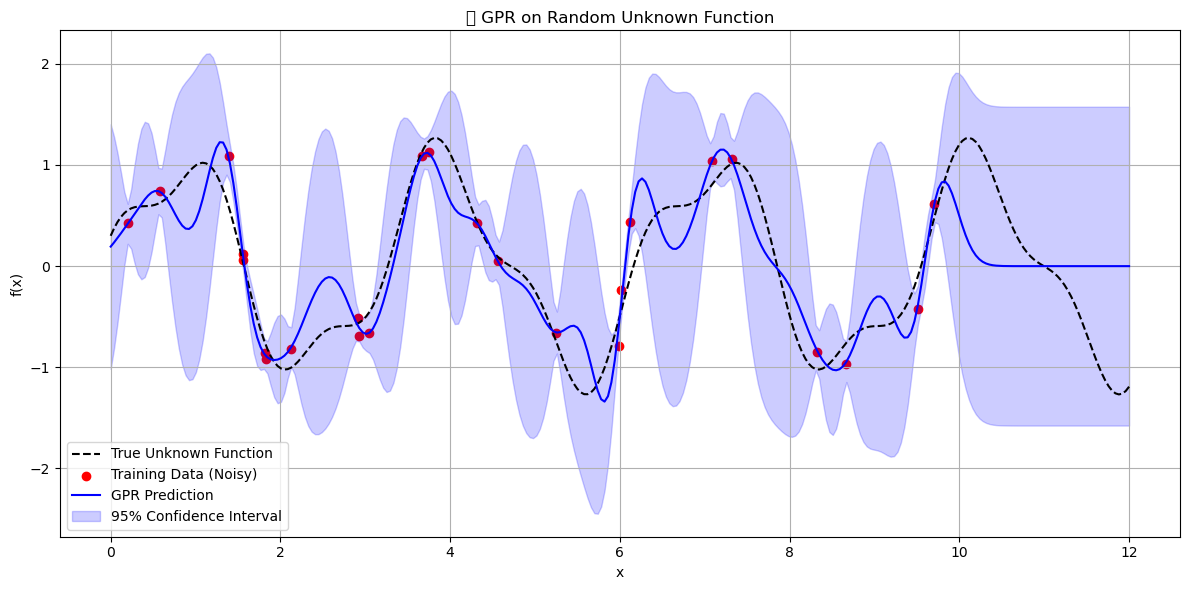

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Step 1: Generate random smooth-looking function
np.random.seed(42)
def f(x):
    return np.sin(2 * x) + 0.3 * np.cos(5 * x)

# Training data (sparse, slightly noisy)
X_train = np.sort(np.random.uniform(0, 10, 25)).reshape(-1, 1)
y_train = f(X_train).ravel() + np.random.normal(0, 0.2, X_train.shape[0])

# Test points (dense)
X_test = np.linspace(0, 12, 300).reshape(-1, 1)

# Step 2: Define kernel and model
kernel = C(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1**2, n_restarts_optimizer=10)

# Step 3: Fit model
gpr.fit(X_train, y_train)

# Step 4: Predict
y_pred, sigma = gpr.predict(X_test, return_std=True)

# Step 5: Plot everything
plt.figure(figsize=(12, 6))
plt.plot(X_test, f(X_test), 'k--', label="True Unknown Function")
plt.scatter(X_train, y_train, color='red', label="Training Data (Noisy)")
plt.plot(X_test, y_pred, 'blue', label="GPR Prediction")
plt.fill_between(X_test.ravel(),
                 y_pred - 1.96 * sigma,
                 y_pred + 1.96 * sigma,
                 alpha=0.2, color='blue', label="95% Confidence Interval")

plt.title("🧠 GPR on Random Unknown Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\jarif\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\jarif\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


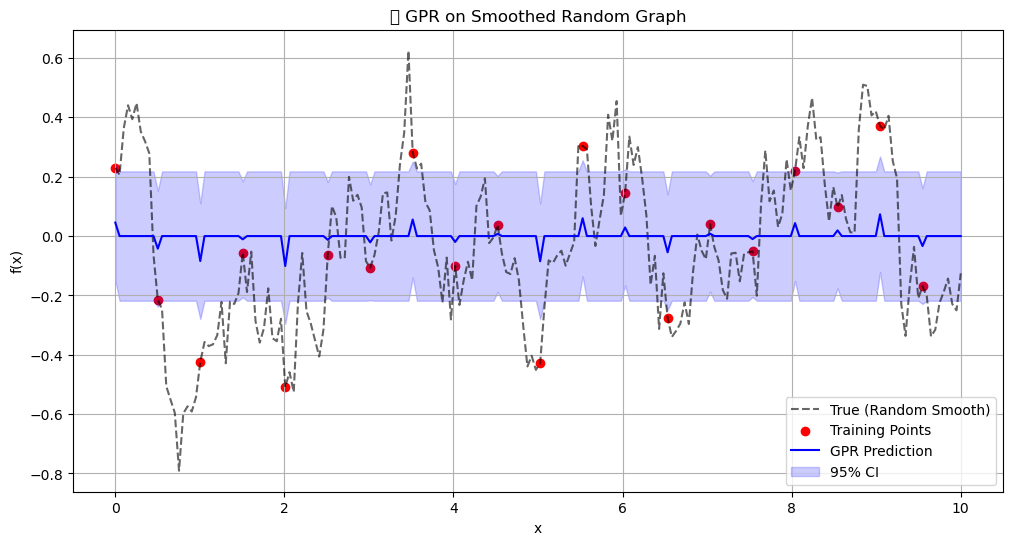

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Step 1: Create random data and smooth it
np.random.seed(42)
x_all = np.linspace(0, 10, 200)
y_random = np.random.randn(len(x_all))

# Smooth using a convolution filter (moving average)
window_size = 10
y_smooth = np.convolve(y_random, np.ones(window_size)/window_size, mode='same')

# Step 2: Choose sparse training data
X_train = x_all[::10].reshape(-1, 1)
y_train = y_smooth[::10]

# Step 3: Define test input (same x_all)
X_test = x_all.reshape(-1, 1)

# Step 4: GPR model
kernel = C(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.05, n_restarts_optimizer=5)
gpr.fit(X_train, y_train)

# Step 5: Predict
y_pred, sigma = gpr.predict(X_test, return_std=True)

# Step 6: Plot
plt.figure(figsize=(12, 6))
plt.plot(x_all, y_smooth, 'k--', alpha=0.6, label="True (Random Smooth)")
plt.scatter(X_train, y_train, color='red', label="Training Points")
plt.plot(X_test, y_pred, 'blue', label="GPR Prediction")
plt.fill_between(x_all, y_pred - 1.96*sigma, y_pred + 1.96*sigma, 
                 color='blue', alpha=0.2, label="95% CI")
plt.title("🧠 GPR on Smoothed Random Graph")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


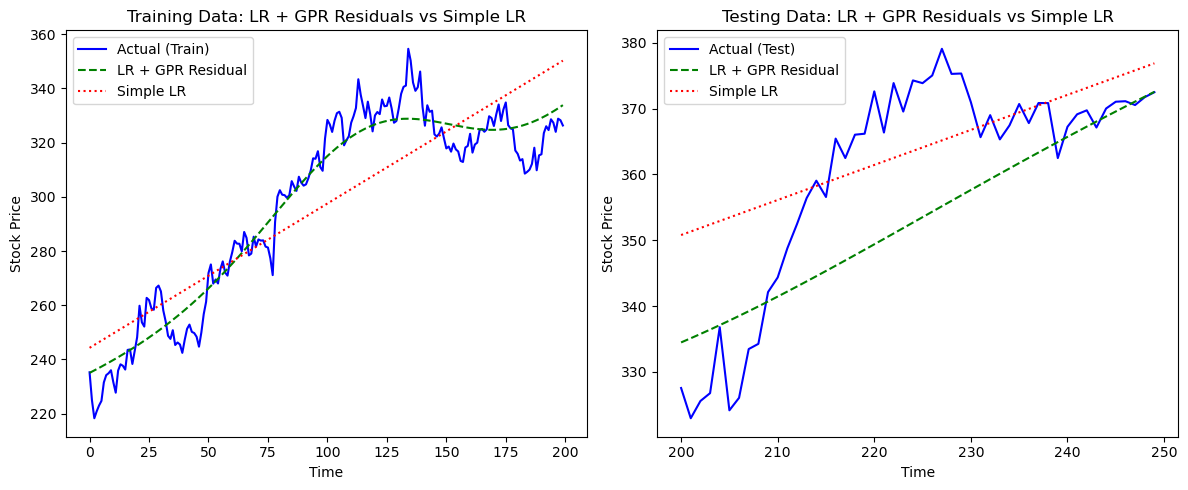

Training RMSE (LR + GPR): 8.6921
Testing RMSE (LR + GPR): 12.3052
Training RMSE (Simple LR): 17.5527
Testing RMSE (Simple LR): 12.1005


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load stock data
def load_stock_data(ticker, start, end):
    stock = yf.download(ticker, start=start, end=end, progress=False)
    prices = stock["Close"].values
    dates = np.arange(len(prices)).reshape(-1, 1)
    return dates, prices

# Normalize prices
def normalize_data(prices):
    scaler = MinMaxScaler()
    prices_scaled = scaler.fit_transform(prices.reshape(-1, 1)).flatten()
    return scaler, prices_scaled

# Split data
def split_data(dates, prices_scaled, train_ratio=0.8):
    train_size = int(len(dates) * train_ratio)
    return dates[:train_size], prices_scaled[:train_size], dates[train_size:], prices_scaled[train_size:]

# Train Linear Regression
def train_lr(X_train, y_train, X_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    return lr, lr.predict(X_train), lr.predict(X_test)

# Train Gaussian Process on residuals
def train_gp(X_train, residuals_train, X_test):
    kernel = C(1.0) * RBF(length_scale=10.0)
    gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
    gp.fit(X_train, residuals_train)
    return gp.predict(X_train), gp.predict(X_test)

# RMSE
def compute_rmse(true, pred):
    return np.sqrt(mean_squared_error(true, pred))

# Main execution
if __name__ == "__main__":
    # 1. Load + normalize
    X, prices = load_stock_data("MSFT", "2023-01-01", "2024-01-01")
    scaler, prices_scaled = normalize_data(prices)
    X_train, y_train, X_test, y_test = split_data(X, prices_scaled)

    # 2. Linear Regression (LR)
    lr, y_lr_train, y_lr_test = train_lr(X_train, y_train, X_test)
    residuals_train = y_train - y_lr_train

    # 3. Residual prediction using GPR
    gp_res_train, gp_res_test = train_gp(X_train, residuals_train, X_test)

    # 4. Combine LR + GP
    final_train_pred = y_lr_train + gp_res_train  # LR predictions + residual correction from GPR
    final_test_pred = y_lr_test + gp_res_test    # LR predictions + residual correction from GPR

    # 5. Inverse transform to get actual price scale
    y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
    y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    final_train_orig = scaler.inverse_transform(final_train_pred.reshape(-1, 1)).flatten()
    final_test_orig = scaler.inverse_transform(final_test_pred.reshape(-1, 1)).flatten()

    # 6. Simple Linear Regression Inverse Transform for actual prices
    simple_lr_train = scaler.inverse_transform(y_lr_train.reshape(-1, 1)).flatten()
    simple_lr_test = scaler.inverse_transform(y_lr_test.reshape(-1, 1)).flatten()

    # 7. Plot
    plt.figure(figsize=(12, 5))

    # Training plot
    plt.subplot(1, 2, 1)
    plt.plot(X_train, y_train_orig, label="Actual (Train)", color="blue")
    plt.plot(X_train, final_train_orig, label="LR + GPR Residual", color="green", linestyle="dashed")
    plt.plot(X_train, simple_lr_train, label="Simple LR", color="red", linestyle="dotted")
    plt.title("Training Data: LR + GPR Residuals vs Simple LR")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()

    # Testing plot
    plt.subplot(1, 2, 2)
    plt.plot(X_test, y_test_orig, label="Actual (Test)", color="blue")
    plt.plot(X_test, final_test_orig, label="LR + GPR Residual", color="green", linestyle="dashed")
    plt.plot(X_test, simple_lr_test, label="Simple LR", color="red", linestyle="dotted")
    plt.title("Testing Data: LR + GPR Residuals vs Simple LR")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 8. Print RMSE
    print(f"Training RMSE (LR + GPR): {compute_rmse(y_train_orig, final_train_orig):.4f}")
    print(f"Testing RMSE (LR + GPR): {compute_rmse(y_test_orig, final_test_orig):.4f}")
    print(f"Training RMSE (Simple LR): {compute_rmse(y_train_orig, simple_lr_train):.4f}")
    print(f"Testing RMSE (Simple LR): {compute_rmse(y_test_orig, simple_lr_test):.4f}")


Training RMSE (GPR only): 9.2749
Testing RMSE (GPR only): 67.3478


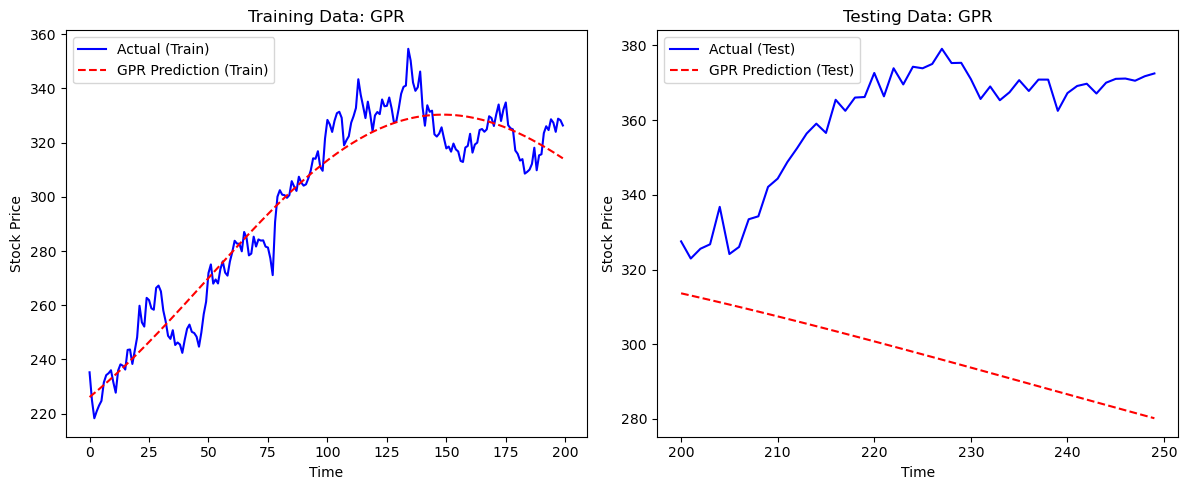

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load stock data
def load_stock_data(ticker, start, end):
    stock = yf.download(ticker, start=start, end=end, progress=False)
    prices = stock["Close"].values
    dates = np.arange(len(prices)).reshape(-1, 1)
    return dates, prices

# Normalize prices
def normalize_data(prices):
    scaler = MinMaxScaler()
    prices_scaled = scaler.fit_transform(prices.reshape(-1, 1)).flatten()
    return scaler, prices_scaled

# Split data
def split_data(dates, prices_scaled, train_ratio=0.8):
    train_size = int(len(dates) * train_ratio)
    return dates[:train_size], prices_scaled[:train_size], dates[train_size:], prices_scaled[train_size:]

# RMSE
def compute_rmse(true, pred):
    return np.sqrt(mean_squared_error(true, pred))

# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    X, prices = load_stock_data("MSFT", "2023-01-01", "2024-01-01")
    scaler, prices_scaled = normalize_data(prices)
    X_train, y_train, X_test, y_test = split_data(X, prices_scaled)

    # GPR model
    kernel = C(1.0) * RBF(length_scale=20.0)
    gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
    gp.fit(X_train, y_train)

    # Predictions
    y_train_pred = gp.predict(X_train)
    y_test_pred = gp.predict(X_test)

    # Inverse transform
    y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
    y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_train_pred_orig = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
    y_test_pred_orig = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

    # RMSE
    print(f"Training RMSE (GPR only): {compute_rmse(y_train_orig, y_train_pred_orig):.4f}")
    print(f"Testing RMSE (GPR only): {compute_rmse(y_test_orig, y_test_pred_orig):.4f}")

    # Plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(X_train, y_train_orig, label="Actual (Train)", color="blue")
    plt.plot(X_train, y_train_pred_orig, label="GPR Prediction (Train)", color="red", linestyle="--")
    plt.title("Training Data: GPR")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(X_test, y_test_orig, label="Actual (Test)", color="blue")
    plt.plot(X_test, y_test_pred_orig, label="GPR Prediction (Test)", color="red", linestyle="--")
    plt.title("Testing Data: GPR")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()

    plt.tight_layout()
    plt.show()
